In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


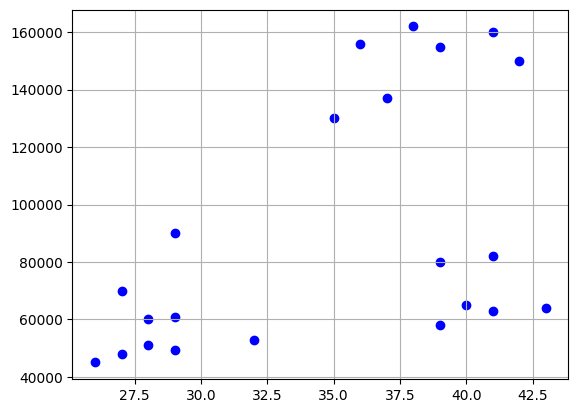

In [3]:
%matplotlib inline

plt.scatter(df.Age, df['Income($)'], color = 'blue')
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(df[['Age' , 'Income($)']])

predicted = km.predict(df[['Age' , 'Income($)']])
print(predicted)

[0 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


In [5]:
df['cluster0'] = predicted
df.head()

,Name,Age,Income($),cluster0
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
df0 = df[df.cluster0 == 0]
df1 = df[df.cluster0 == 1]
df2 = df[df.cluster0 == 2]

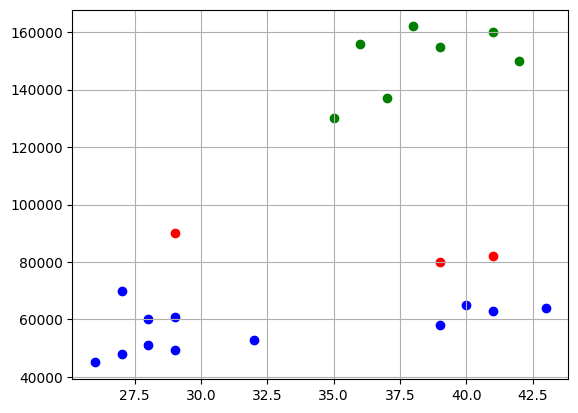

In [7]:
plt.scatter(df0.Age, df0['Income($)'], color = 'blue')
plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')

plt.grid()
plt.show()

In [8]:
# the issue occurred due to the vast gap in the data between 40,000 to 160,000 hence we have to scale the values to get accurate results

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df['Age'] = scaler.fit_transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster0
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [10]:
# Retrain the Model

km.fit(df[['Age' , 'Income($)']])

predicted_scaled = km.predict(df[['Age' , 'Income($)']])
print(predicted_scaled)

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


In [11]:
df['cluster1'] = predicted_scaled

In [12]:
df0_scaled = df[df.cluster1 == 0]
df1_scaled = df[df.cluster1 == 1]
df2_scaled = df[df.cluster1 == 2]

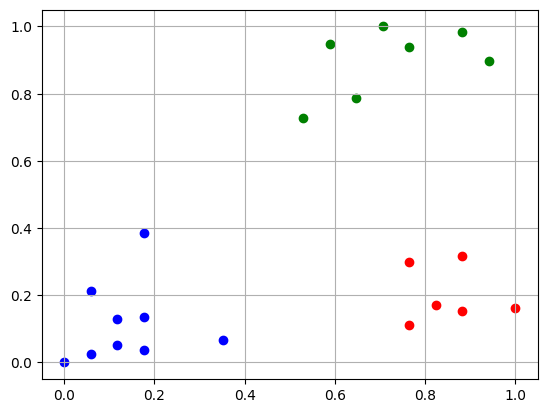

In [13]:
%matplotlib inline

plt.scatter(df0_scaled.Age, df0_scaled['Income($)'], color = 'blue')
plt.scatter(df1_scaled.Age, df1_scaled['Income($)'], color = 'green')
plt.scatter(df2_scaled.Age, df2_scaled['Income($)'], color = 'red')

plt.grid()
plt.show()

In [14]:
centers = km.cluster_centers_
print(centers)

[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


In [16]:
df.head(20)

,Name,Age,Income($),cluster0,cluster1
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1
